## Import Modules

In [14]:
import sys
sys.path.append('..')

import pandas as pd
from plotter import Plotter
from processor import Processor

## Import Plotter

In [15]:
processor = Processor()
plotter = Plotter()

## Plot Kernel Density Estimates

In [16]:
serial_kde = processor.read_pickle('../data/processed/serial_kde.pkl')
simd_kde = processor.read_pickle('../data/processed/serial_kde.pkl')
cuda_kde = processor.read_pickle('../data/processed/cuda_kde.pkl')
mpi_kde = processor.read_pickle('../data/processed/mpi_kde.pkl')

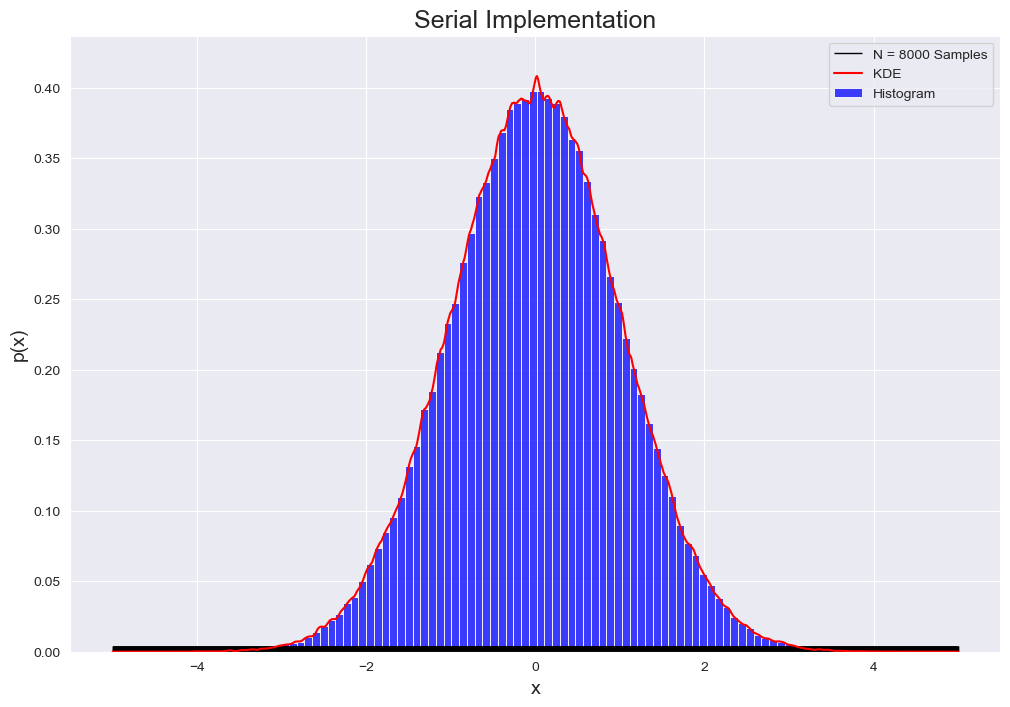

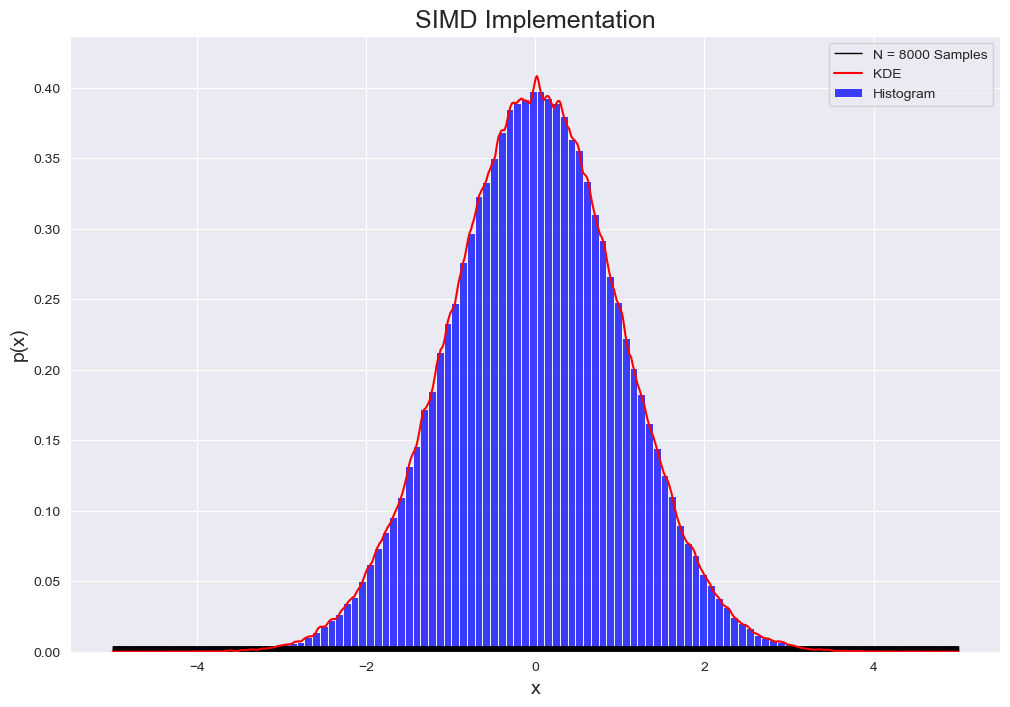

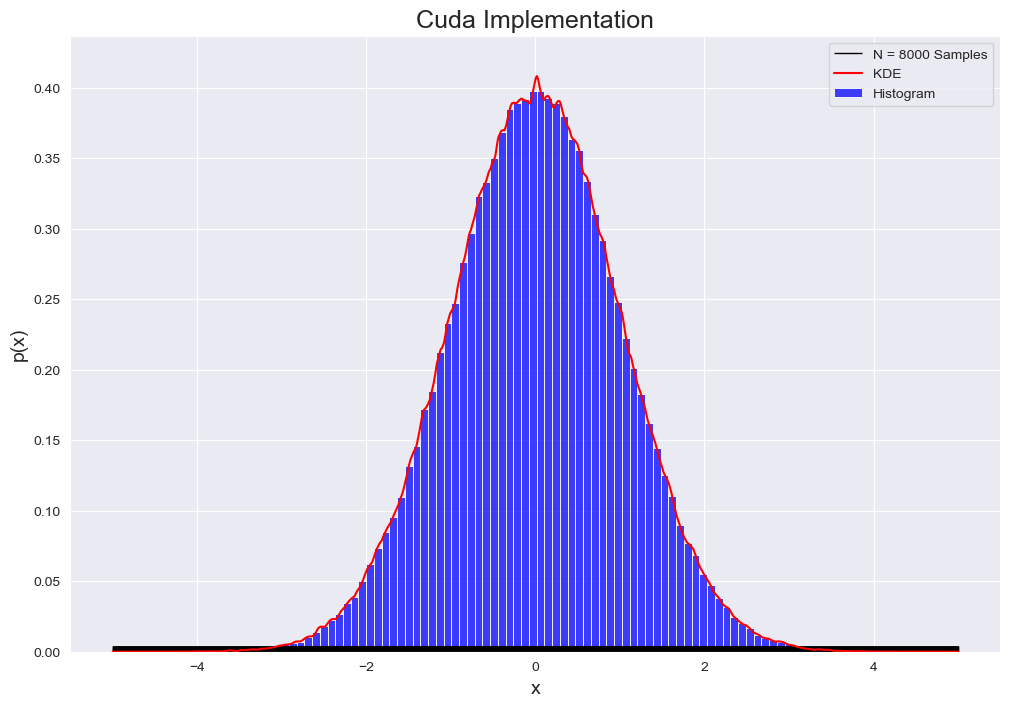

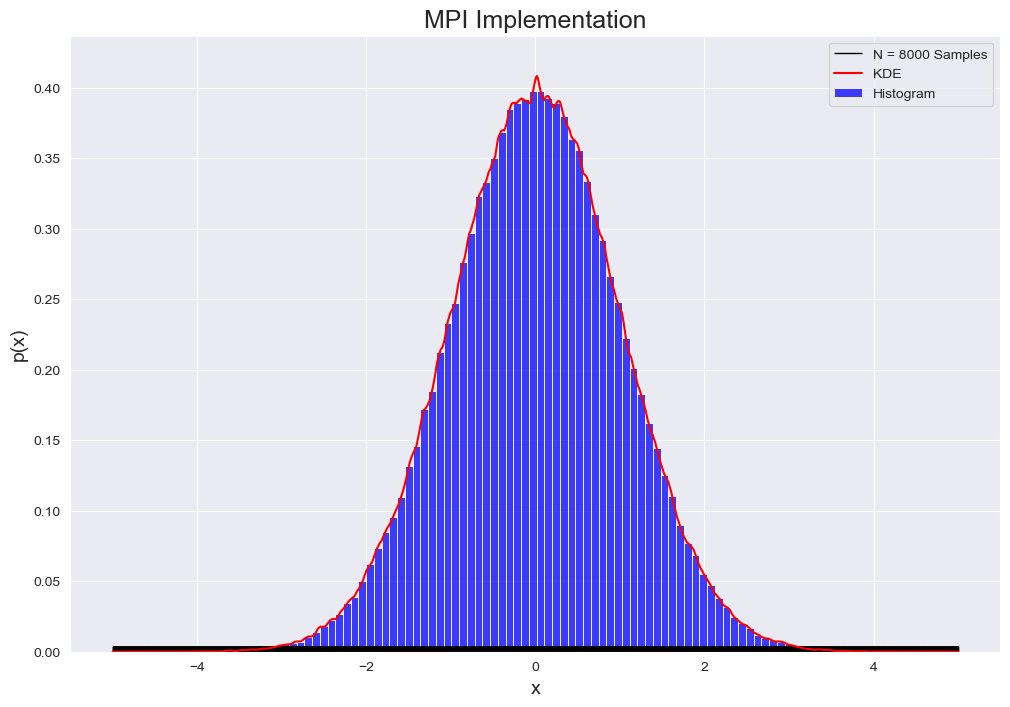

In [17]:
plotter.plot_single_kde(serial_kde, "Serial Implementation", hist=True, rug=True, kde=True)
plotter.plot_single_kde(simd_kde, "SIMD Implementation", hist=True, rug=True, kde=True)
plotter.plot_single_kde(cuda_kde, "Cuda Implementation", hist=True, rug=True, kde=True)
plotter.plot_single_kde(mpi_kde, "MPI Implementation", hist=True, rug=True, kde=True)

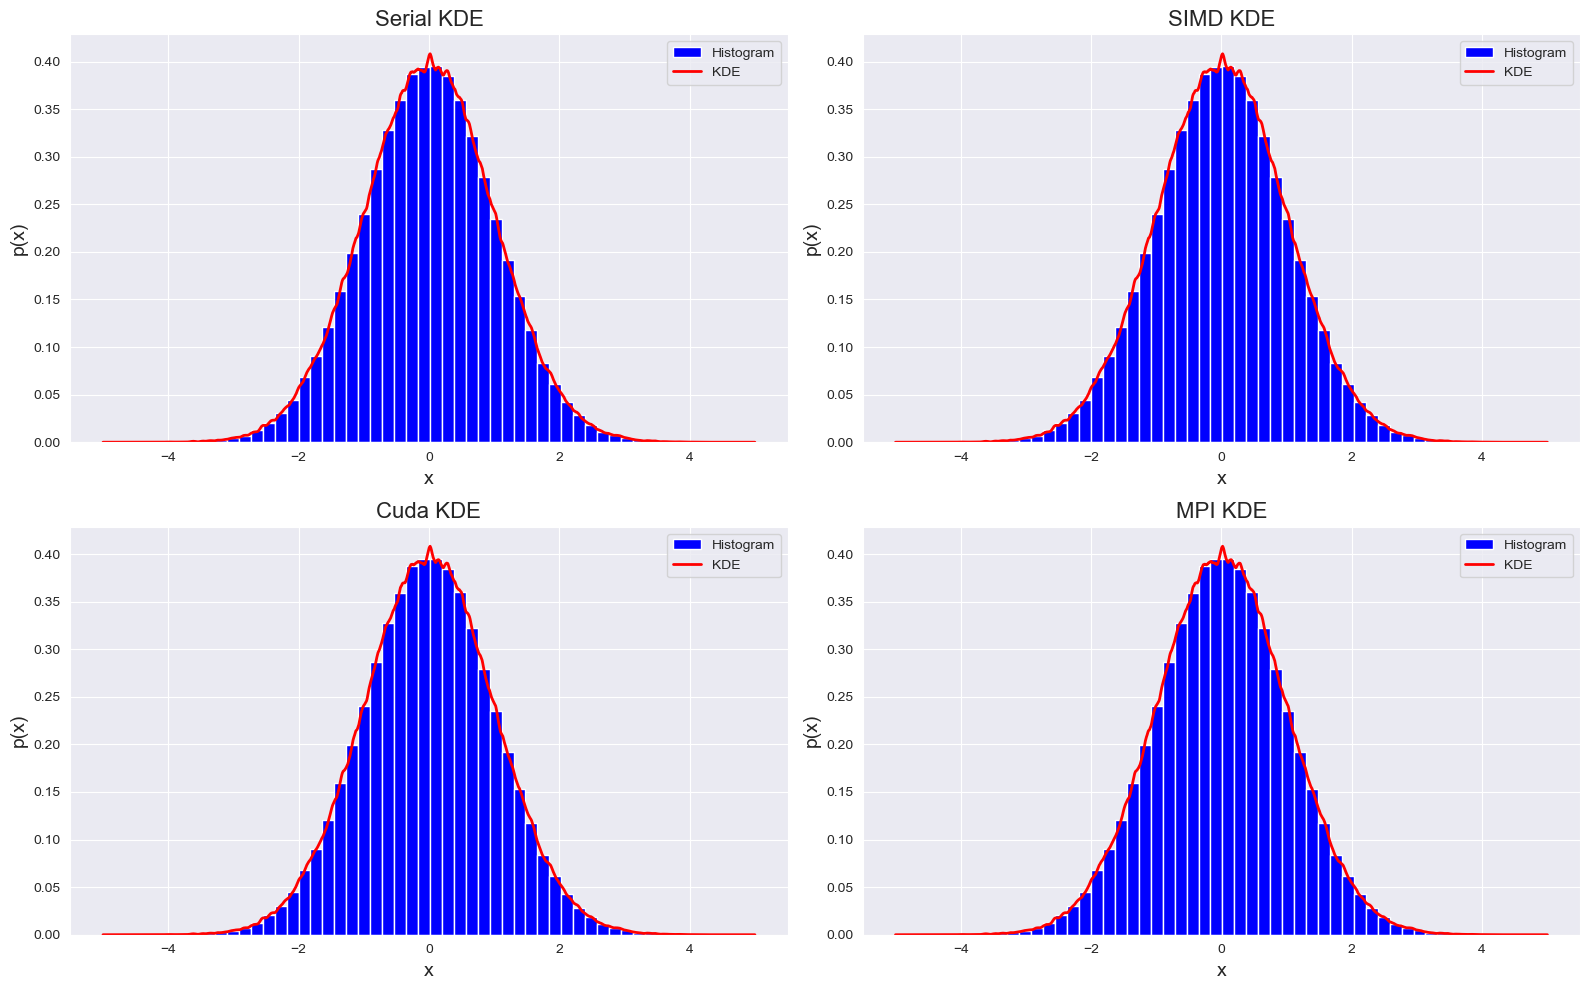

In [18]:
dfs = [serial_kde, simd_kde, cuda_kde, mpi_kde]
titles = ["Serial KDE", "SIMD KDE", "Cuda KDE", "MPI KDE"]

plotter.plot_multiple_kdes(dfs, titles=titles, hist=True, kde=True, save=True, filename="multiple_kde.png")

## Plot Scalings

### Plot MPI Scalings

In [19]:
time_exec = pd.read_pickle('../data/processed/execution_times.pkl')
flops_per_sec = pd.read_pickle('../data/processed/flops_per_sec.pkl')

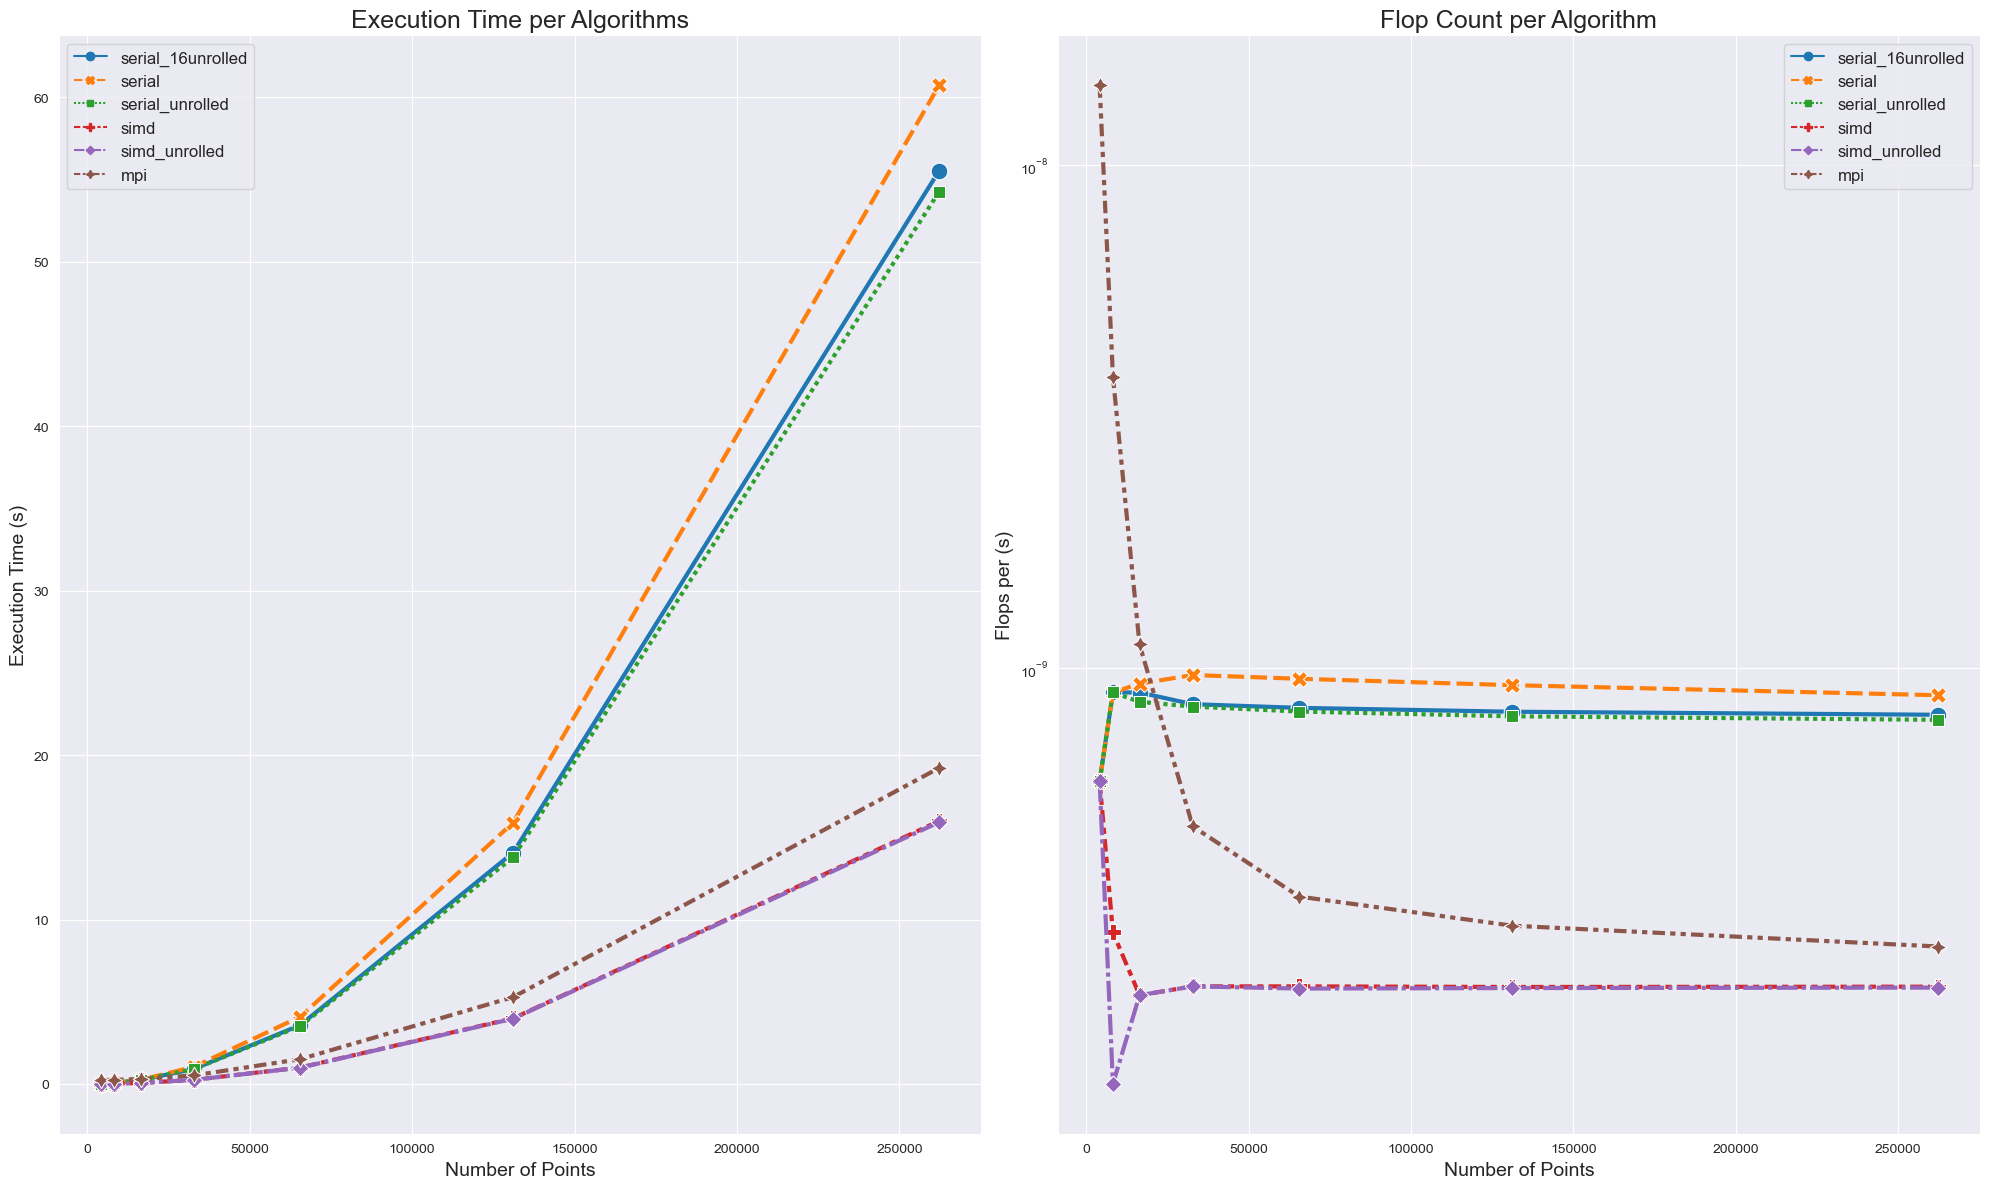

In [20]:
plotter.plot_executions_flops(time_exec, flops_per_sec, fig_size=(20,12),save=True, filename="executions_flops.png")

In [21]:
mpi_core = pd.read_pickle('../data/processed/mpi_core.pkl')

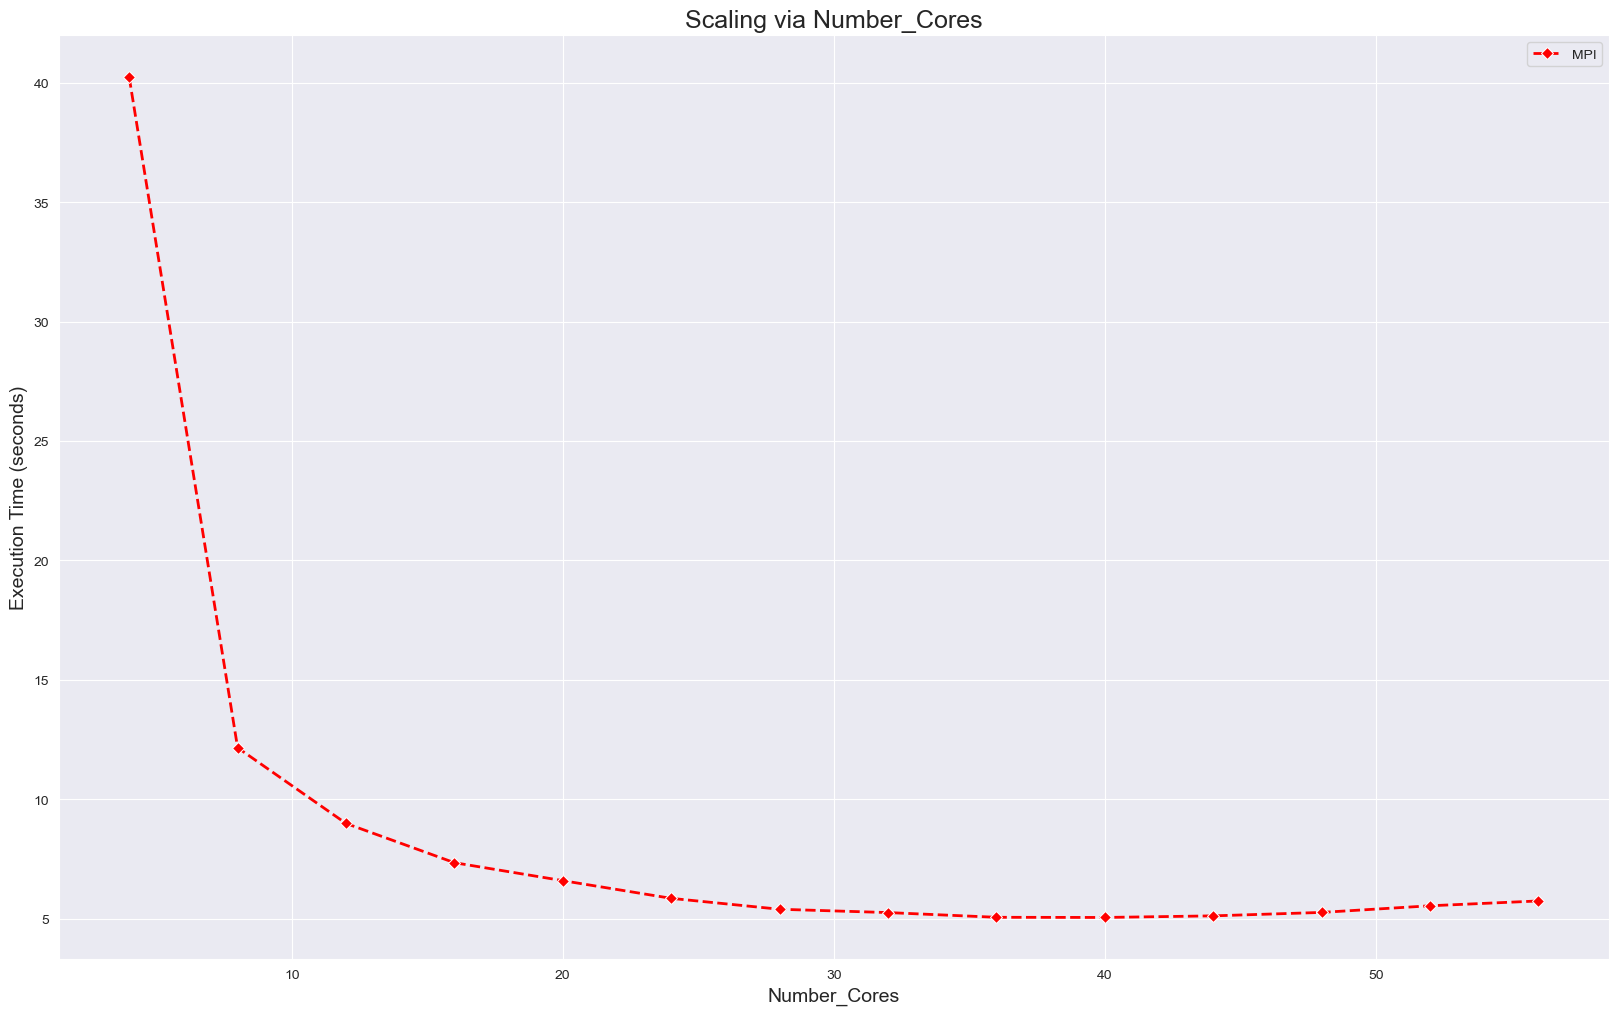

In [22]:
plotter.plot_execution_time(mpi_core, parallel_type="MPI", fig_size=(20,12), save=True, filename="mpi_core.png")

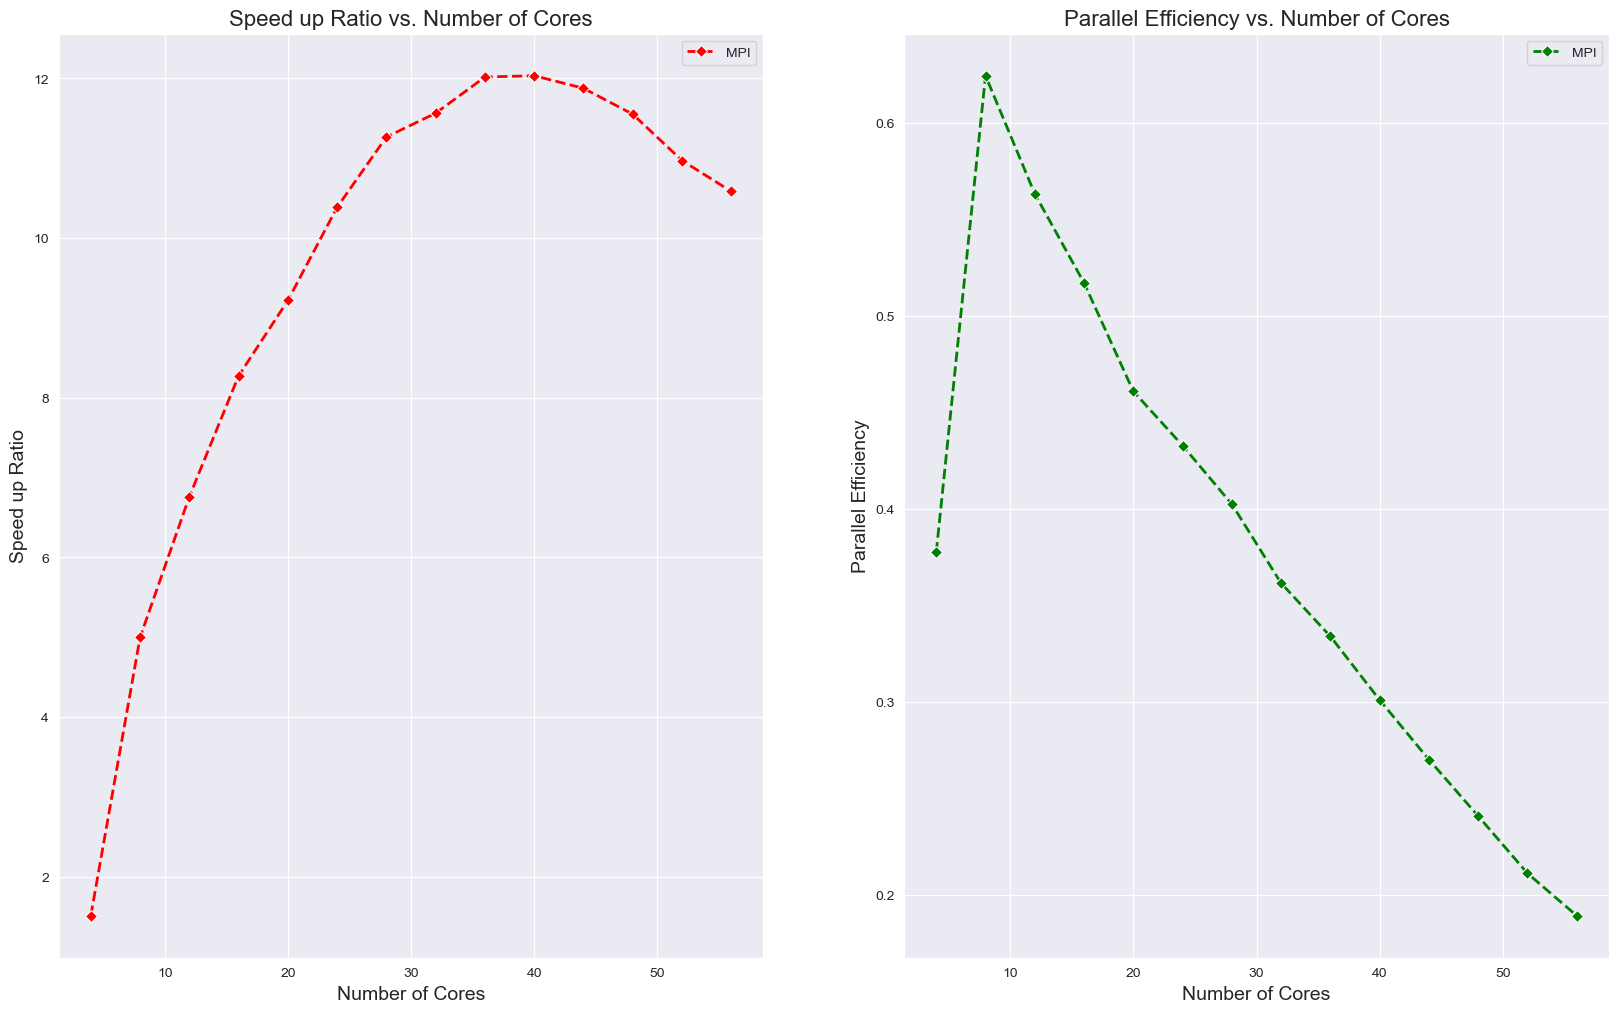

In [23]:
plotter.plot_speedup_efficiency(mpi_core, fig_size=(20,12), save=True, filename="mpi_speedup_efficiency.png")

### Plot Cuda Scalings

In [24]:
cuda_threads = pd.read_pickle('../data/processed/cuda_threads.pkl')
cuda_tiles = pd.read_pickle('../data/processed/cuda_tiles.pkl')

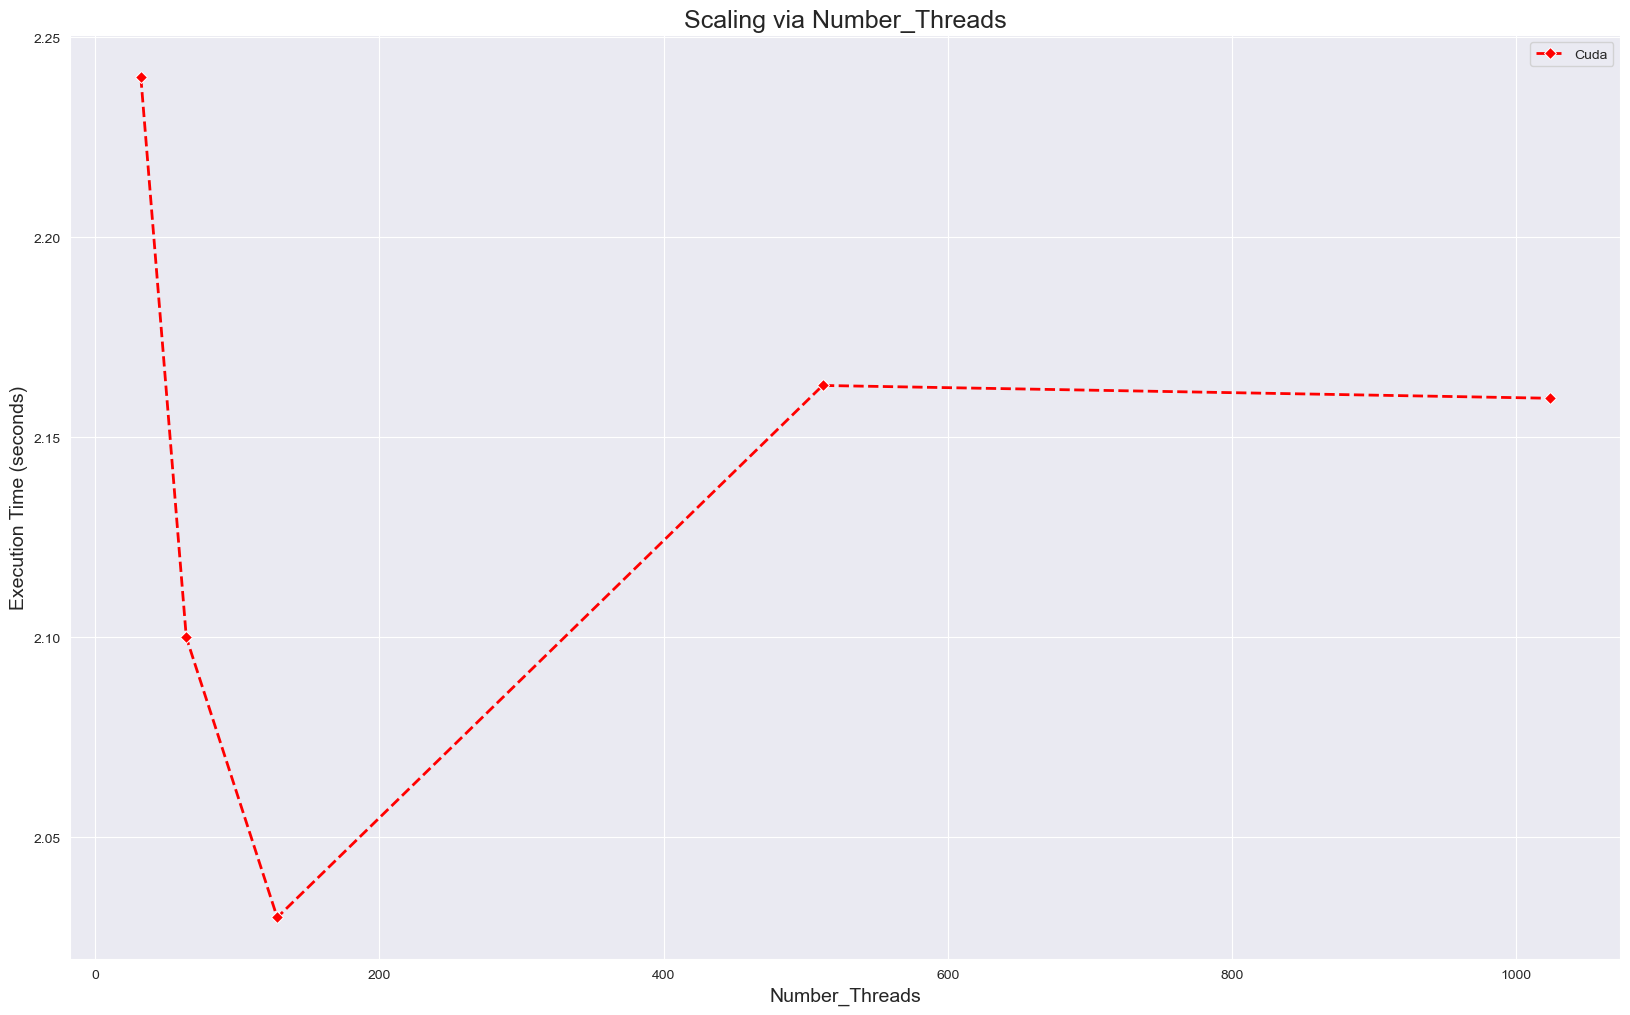

In [25]:
plotter.plot_execution_time(cuda_threads, parallel_type="Cuda Threads", fig_size=(20,12), save=True, filename="cuda_threads.png")

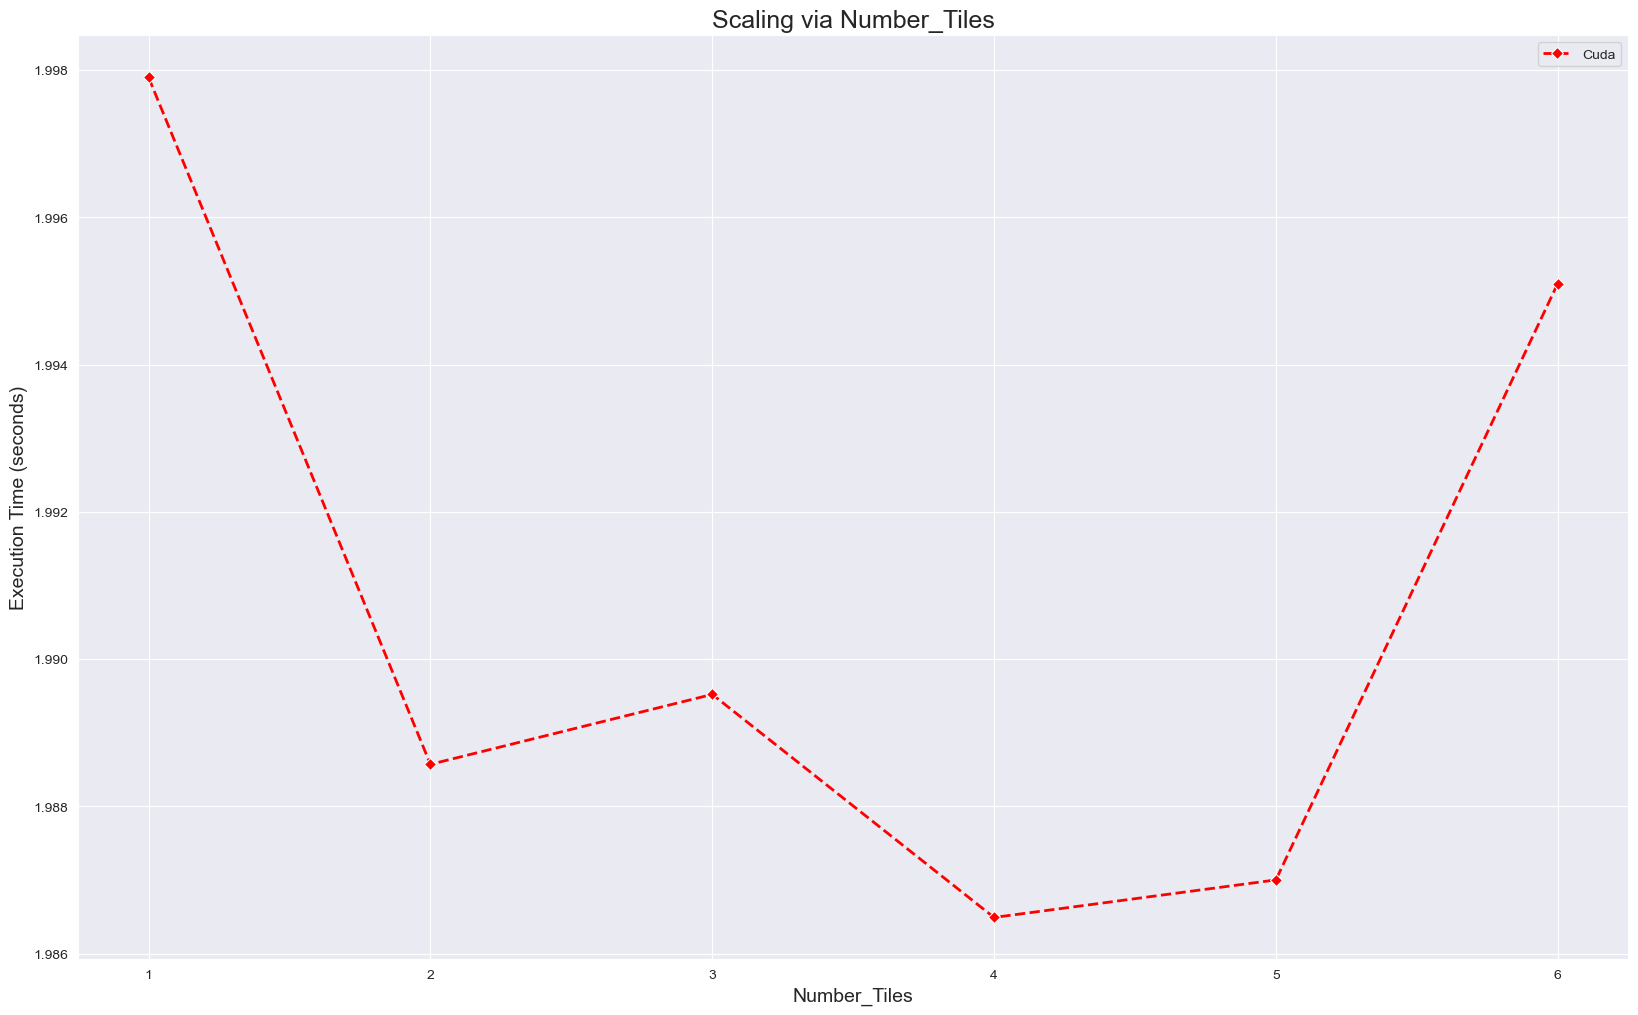

In [26]:
plotter.plot_execution_time(cuda_tiles, parallel_type="Cuda Tiles", fig_size=(20,12), save=True, filename="cuda_tiles.png")